In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/wednesday.csv')
data = data.reset_index()
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,80,38308,1,1,6,6,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,389,479,11,5,172,326,79,0,15.636364,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,88,1095,10,6,3150,3150,1575,0,315.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,389,15206,17,12,3452,6660,1313,0,203.058823,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,88,1092,9,6,3150,3152,1575,0,350.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,692698,53,32215,4,2,112,152,28,28,28.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,692699,53,324,2,2,84,362,42,42,42.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,692700,58030,82,2,1,31,6,31,0,15.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692701,692701,53,1048635,6,2,192,256,32,32,32.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 80 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   index                         692703 non-null  int64  
 1    Destination Port             692703 non-null  int64  
 2    Flow Duration                692703 non-null  int64  
 3    Total Fwd Packets            692703 non-null  int64  
 4    Total Backward Packets       692703 non-null  int64  
 5   Total Length of Fwd Packets   692703 non-null  int64  
 6    Total Length of Bwd Packets  692703 non-null  int64  
 7    Fwd Packet Length Max        692703 non-null  int64  
 8    Fwd Packet Length Min        692703 non-null  int64  
 9    Fwd Packet Length Mean       692703 non-null  float64
 10   Fwd Packet Length Std        692703 non-null  float64
 11  Bwd Packet Length Max         692703 non-null  int64  
 12   Bwd Packet Length Min        692703 non-nul

In [ ]:
data.isnull().sum()

index                      0
 Destination Port          0
 Flow Duration             0
 Total Fwd Packets         0
 Total Backward Packets    0
                          ..
Idle Mean                  0
 Idle Std                  0
 Idle Max                  0
 Idle Min                  0
 Label                     0
Length: 80, dtype: int64

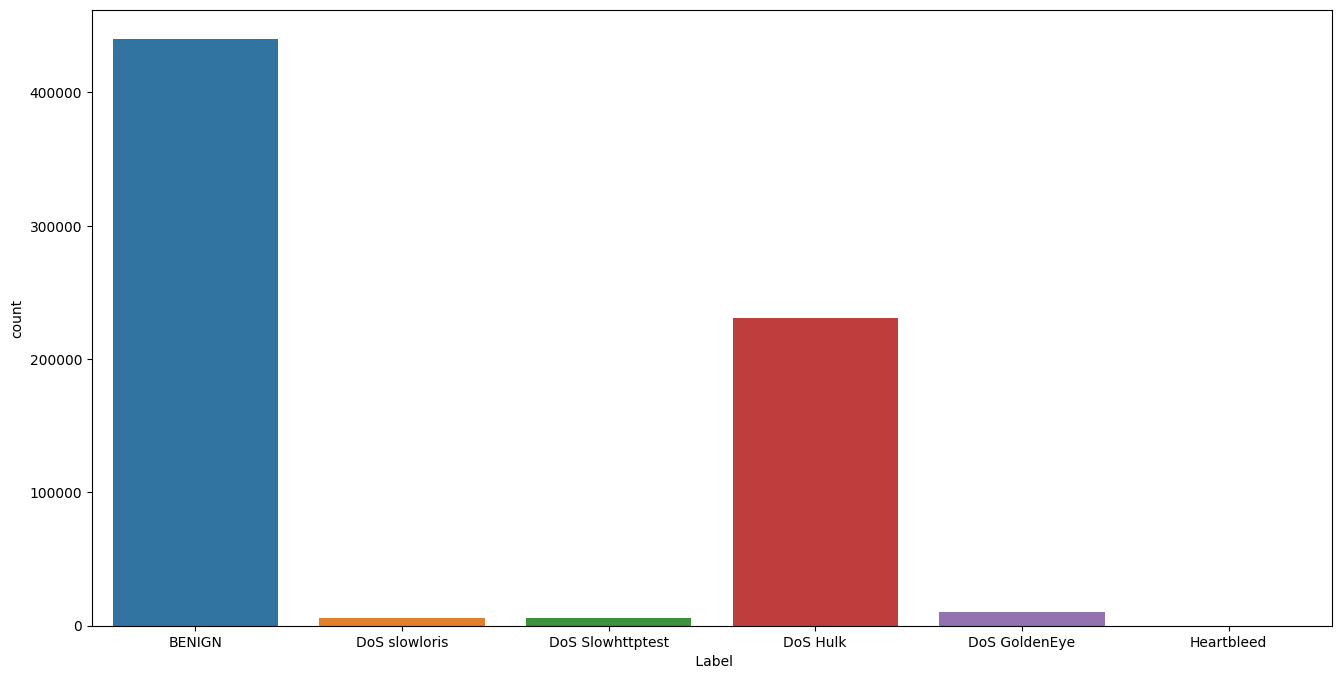

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x= ' Label', data=data)
plt.show()

In [ ]:
data.describe()

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,346351.000000,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,199966.276097,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,173175.500000,53.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,346351.000000,80.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,519526.500000,443.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,692702.000000,65487.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
data.groupby(' Label').size()

 Label
BENIGN              440031
DoS GoldenEye        10293
DoS Hulk            231073
DoS Slowhttptest      5499
DoS slowloris         5796
Heartbleed              11
dtype: int64

<Axes: >

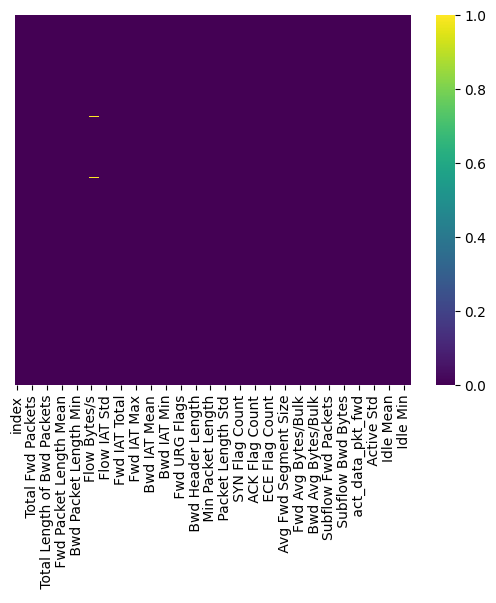

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [3]:
data.dropna(inplace=True)

<Axes: >

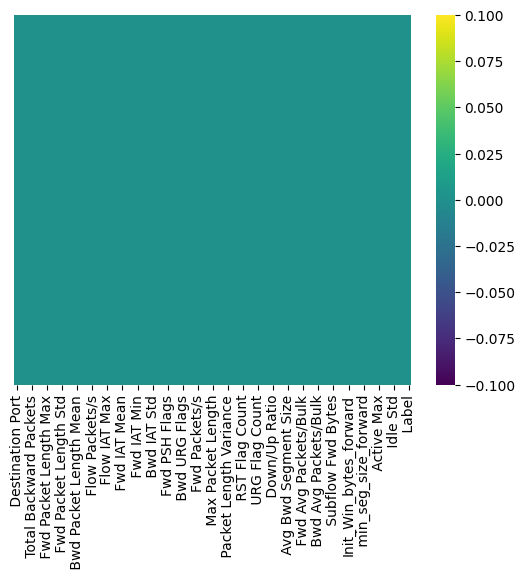

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [7]:
X = data.drop(' Label', axis=1)
Y = data[' Label']
print(X)
print(Y)

         index   Destination Port   Flow Duration   Total Fwd Packets  \
0            0                 80           38308                   1   
1            1                389             479                  11   
2            2                 88            1095                  10   
3            3                389           15206                  17   
4            4                 88            1092                   9   
...        ...                ...             ...                 ...   
692698  692698                 53           32215                   4   
692699  692699                 53             324                   2   
692700  692700              58030              82                   2   
692701  692701                 53         1048635                   6   
692702  692702                 53           94939                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
0                             1                            

                         importance
feature                            
index                         0.126
 Bwd Packet Length Std        0.070
Bwd Packet Length Max         0.047
 Bwd Packet Length Mean       0.046
 Subflow Bwd Bytes            0.042
...                             ...
 CWE Flag Count               0.000
 RST Flag Count               0.000
 Bwd PSH Flags                0.000
 Fwd URG Flags                0.000
 ECE Flag Count               0.000

[79 rows x 1 columns]


<Axes: xlabel='feature'>

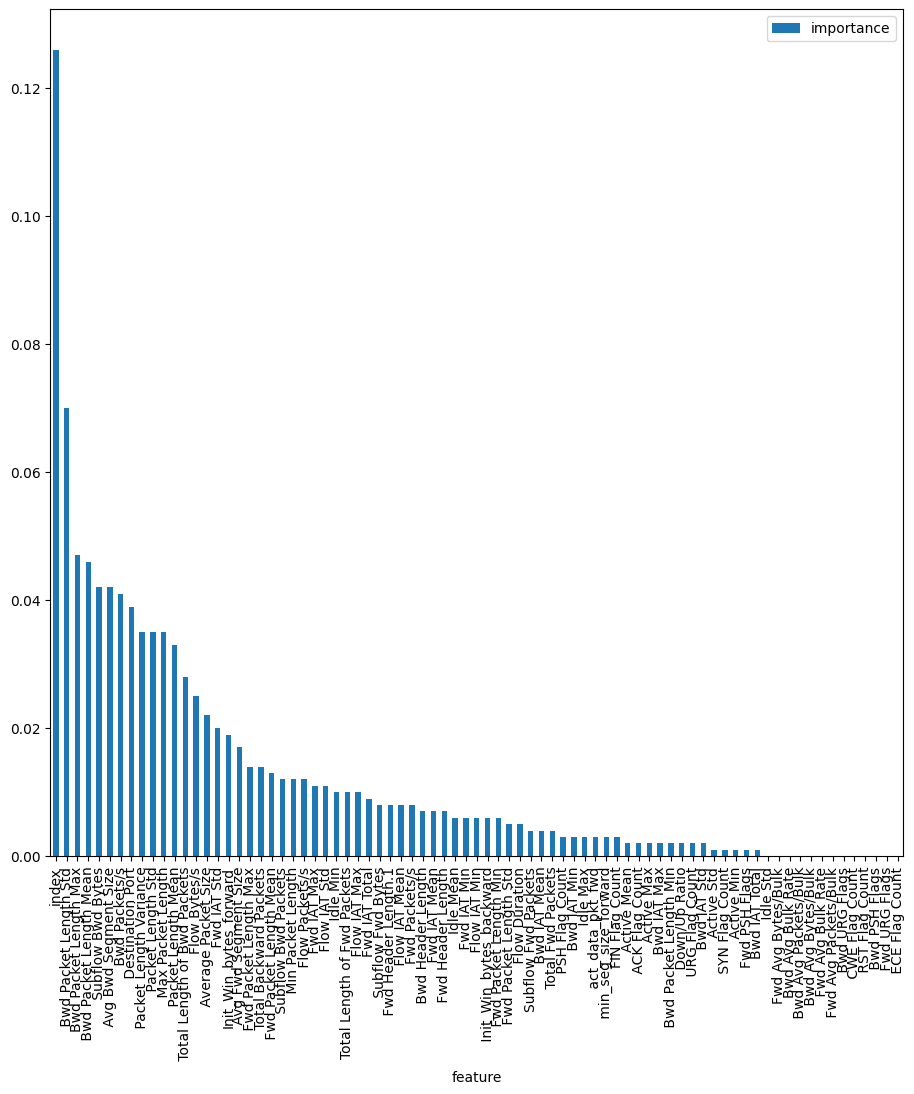

In [ ]:
# using random forest to show the order of festures from most important to least important
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, Y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances)

plt.rcParams['figure.figsize'] = (11, 11)
importances.plot.bar()

In [ ]:
print(data.columns)

Index(['index', ' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Var

In [4]:
# creating a new data of just the important features as seen above
index = data['index'] #1
BWD_pl_std = data[' Bwd Packet Length Std'] #2
Bwd_pl_max = data['Bwd Packet Length Max'] #3
Bwd_pl_mean = data[' Bwd Packet Length Mean'] #4
subflow_bwd_bytes = data[' Subflow Bwd Bytes'] #5
avg_bwd_segmentsize = data[' Avg Bwd Segment Size'] #6
bwd_packets = data[' Bwd Packets/s'] #7
destination_port = data[' Destination Port'] #8
pack_length_variance = data[' Packet Length Variance'] #9
pack_length_std = data[' Packet Length Std'] #10
max_pack_length = data[' Max Packet Length'] #11
pack_length_mean = data[' Packet Length Mean'] #12
tot_lengthof_bwd_packets = data[' Total Length of Bwd Packets'] #13
flow_bytes = data['Flow Bytes/s'] #14
avg_packet_size = data[' Average Packet Size'] #15
fwd_iat_std = data[' Fwd IAT Std'] #16
init_win_byt_fwd = data['Init_Win_bytes_forward'] #17
avgfwd_segment_size = data[' Avg Fwd Segment Size'] #18

In [5]:
new_x = pd.concat([index,BWD_pl_std,Bwd_pl_max,Bwd_pl_mean,subflow_bwd_bytes,avg_bwd_segmentsize,bwd_packets,
                   destination_port,pack_length_variance,pack_length_std,max_pack_length,pack_length_mean,
                   data[' Idle Max'],data[' Active Std'],data['Active Mean'],data[' Bwd PSH Flags'],data[' Down/Up Ratio'],data[' Fwd Header Length.1']],axis=1)
new_x


news_x = pd.concat([data[' Bwd IAT Max'],data[' Fwd Avg Packets/Bulk'],data[' Fwd URG Flags'],data[' URG Flag Count'],
                   data[' Idle Max'],data[' Active Std'],data['Active Mean'],data[' Bwd PSH Flags'],data[' Down/Up Ratio'],data[' Fwd Header Length.1']],axis=1)
new_x


,index,Bwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Subflow Bwd Bytes,Avg Bwd Segment Size,Bwd Packets/s,Destination Port,Packet Length Variance,Packet Length Std,Max Packet Length,Packet Length Mean,Idle Max,Active Std,Active Mean,Bwd PSH Flags,Down/Up Ratio,Fwd Header Length.1
0,0,0.000000,6,6.000000,6,6.000000,26.104208,80,0.000000,0.000000,6,6.000000,0,0.0,0.0,0,1,20
1,1,89.278777,163,65.200000,326,65.200000,10438.413360,389,3195.595588,56.529599,163,29.294118,0,0.0,0.0,0,0,368
2,2,813.326503,1575,525.000000,3150,525.000000,5479.452055,88,451250.132400,671.751541,1575,370.588235,0,0.0,0.0,0,0,336
3,3,977.480342,3069,555.000000,6660,555.000000,789.162173,389,496537.374700,704.654082,3069,337.066667,0,0.0,0.0,0,0,560
4,4,813.842901,1576,525.333333,3152,525.333333,5494.505495,88,496440.116700,704.585067,1576,393.875000,0,0.0,0.0,0,0,304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,692698,0.000000,76,76.000000,152,76.000000,62.082881,53,548.571429,23.421602,76,41.714286,0,0.0,0.0,0,0,80
692699,692699,0.000000,181,181.000000,362,181.000000,6172.839506,53,5796.300000,76.133435,181,97.600000,0,0.0,0.0,0,1,40
692700,692700,0.000000,6,6.000000,6,6.000000,12195.121950,58030,267.333333,16.350331,31,17.000000,0,0.0,0.0,0,0,64
692701,692701,0.000000,128,128.000000,256,128.000000,1.907241,53,1792.000000,42.332021,128,53.333333,0,0.0,0.0,0,0,120


In [8]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(news_x, Y, test_size=0.3, random_state=42)

In [23]:
lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, Y_train)

array([[-2.5182892 ,  0.03577225,  0.29777604, -0.25238264, -0.03452214],
       [ 0.39538011,  0.0666433 ,  0.00991949, -1.20840457, -0.01926534],
       [ 0.85764299,  0.30064734,  0.25813821,  0.4817661 , -0.0169049 ],
       ...,
       [-3.03746089,  0.03093606,  0.35121358, -0.08176946, -0.03670672],
       [ 0.85766232,  0.30066975,  0.25815454,  0.48173299, -0.01376308],
       [-3.02938982,  0.02881091,  0.3488464 , -0.08449458, -0.03488355]])

In [24]:
model_RFC = RandomForestClassifier(random_state=1, min_samples_leaf=4, max_depth=10)
model_RFC.fit(X_train, Y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(Y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96    131868
           1       0.98      0.91      0.94      3122
           2       0.90      0.95      0.93     69067
           3       0.97      0.75      0.84      1644
           4       0.99      0.51      0.67      1718
           5       0.00      0.00      0.00         3

    accuracy                           0.94    207422
   macro avg       0.80      0.68      0.72    207422
weighted avg       0.95      0.94      0.94    207422



0.9448081688538342

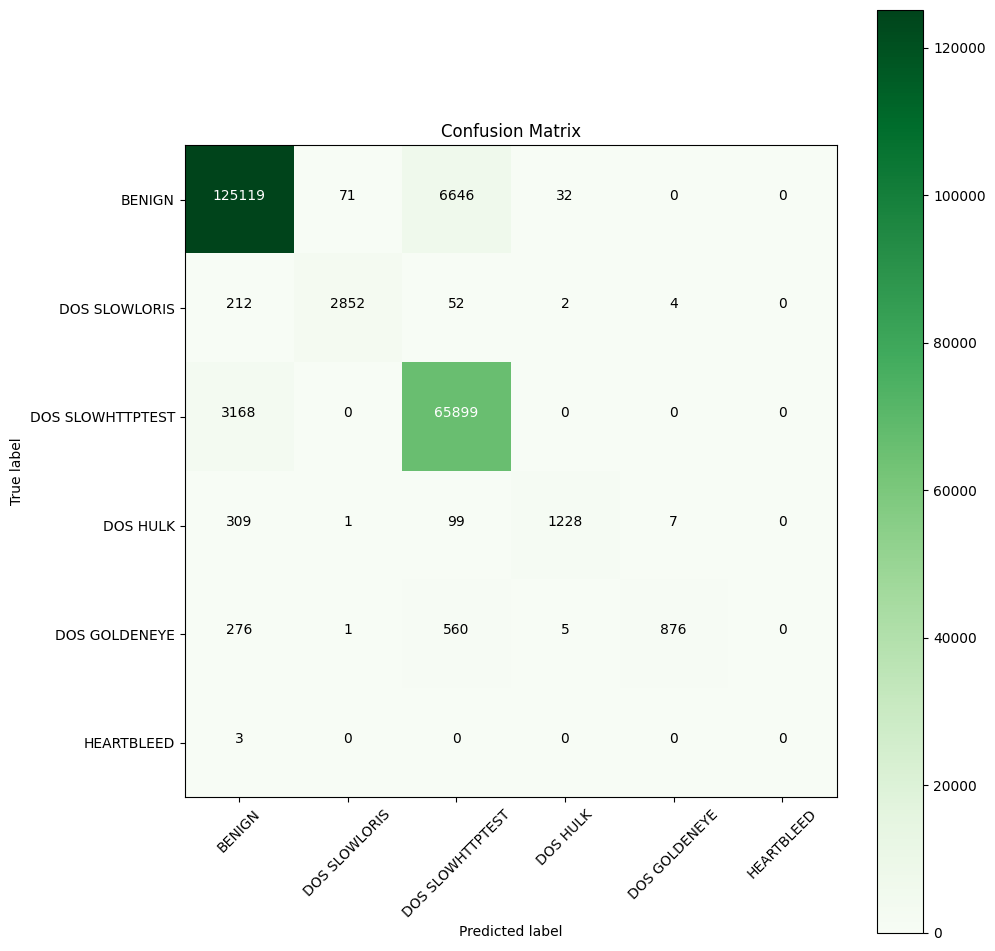

In [25]:
import itertools
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_RFC)
target_names = ["BENIGN", "DOS SLOWLORIS", "DOS SLOWHTTPTEST", "DOS HULK", "DOS GOLDENEYE", "HEARTBLEED"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_RFC)

In [26]:
#KNN model

model_KNN = KNeighborsClassifier(n_neighbors=7)
model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95    131868
           1       0.89      0.93      0.91      3122
           2       0.88      0.97      0.92     69067
           3       0.94      0.77      0.85      1644
           4       0.92      0.81      0.86      1718
           5       1.00      1.00      1.00         3

    accuracy                           0.94    207422
   macro avg       0.94      0.90      0.92    207422
weighted avg       0.94      0.94      0.94    207422



0.9397122773861982

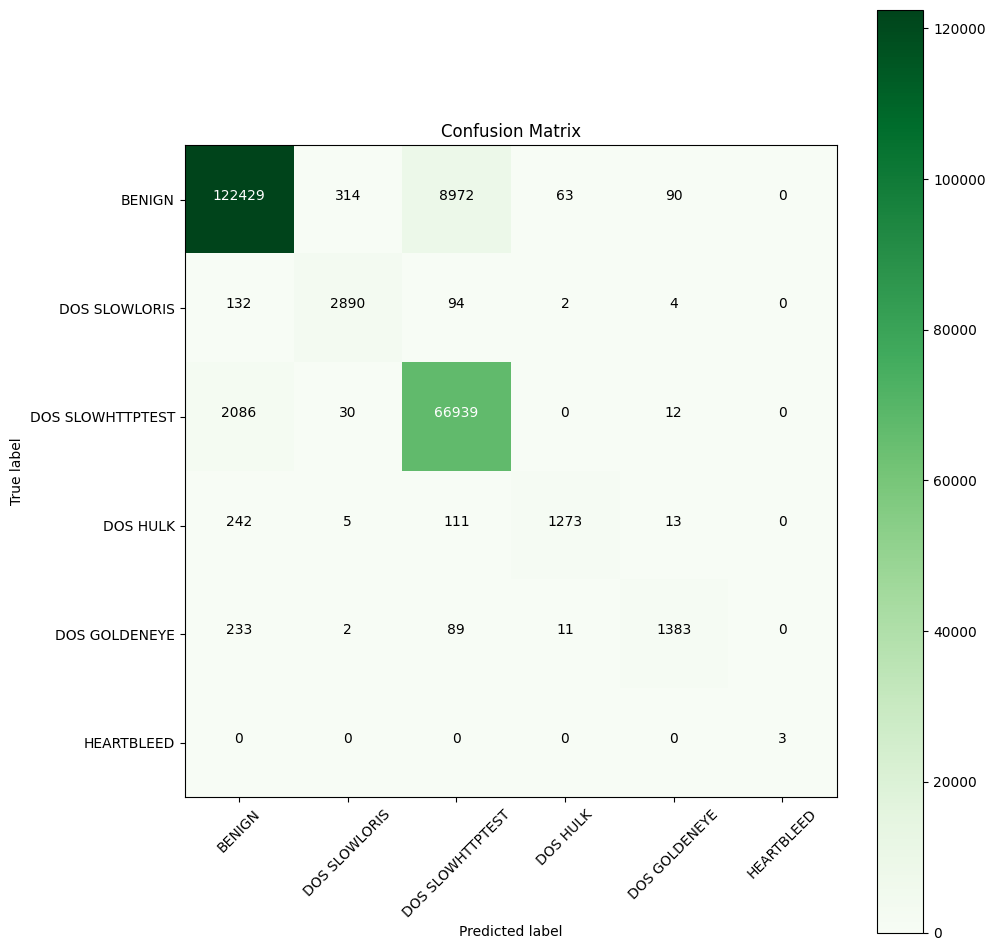

In [27]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_KNN)
target_names = ["BENIGN", "DOS SLOWLORIS", "DOS SLOWHTTPTEST", "DOS HULK", "DOS GOLDENEYE", "HEARTBLEED"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_KNN)

In [33]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(news_x, Y, test_size=0.3, random_state=42)
#Logistic regression

model_LR = LogisticRegression(max_iter=250, verbose=3, n_jobs=7)
model_LR.fit(X_train, Y_train)
y_pred_LR = model_LR.predict(X_test)
print(classification_report(y_test, y_pred_LR))

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   1 out of   1 | elapsed:   49.8s finished


              precision    recall  f1-score   support

           0       0.83      0.86      0.85    131868
           1       0.00      0.00      0.00      3122
           2       0.88      0.62      0.73     69067
           3       0.49      0.50      0.50      1644
           4       0.01      0.12      0.02      1718
           5       0.00      0.00      0.00         3

    accuracy                           0.76    207422
   macro avg       0.37      0.35      0.35    207422
weighted avg       0.83      0.76      0.78    207422



0.7587623299360724

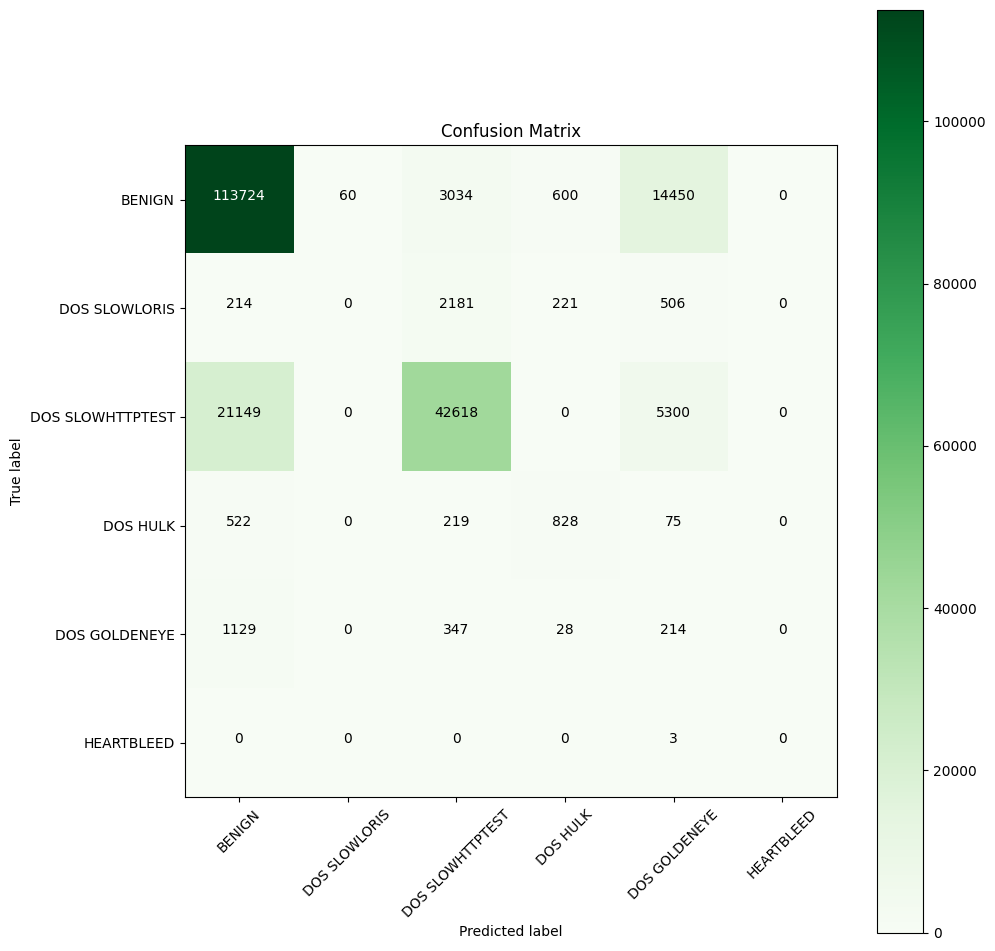

In [34]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_LR)
target_names = ["BENIGN", "DOS SLOWLORIS", "DOS SLOWHTTPTEST", "DOS HULK", "DOS GOLDENEYE", "HEARTBLEED"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_LR)